In [1]:
from astropy import units as u
import numpy as np
from glob import glob
import os
from pyuvdata import UVData
from astropy.coordinates import Angle
from astropy.io import fits
from tqdm.notebook import tqdm
#from casatasks import importuvfits, exportfits, tclean, importfits
import matplotlib.pyplot as plt
%matplotlib notebook
from astropy.wcs import WCS

In [2]:
def filehandle(fullpath):
    path, filename = os.path.split(fullpath)
    basename, ext = os.path.splitext(filename)
    ext = ext[1:]
    return path, basename, ext

In [5]:
ls /lustre/aoc/projects/hera/jaguirre/HERA19Summer2020/LSTSlice/2457548/*11h00m00s*/*.avg.image.fits

/lustre/aoc/projects/hera/jaguirre/HERA19Summer2020/LSTSlice/2457548/lst.2457548.11h00m00s.11h05m50s.uvcRP.phased.avg.image/lst.2457548.11h00m00s.11h05m50s.uvcRP.phased.avg.image.fits


In [12]:
lstpath = '/lustre/aoc/projects/hera/jaguirre/HERA19Summer2020/LSTSlice/'
JD  = '2457548' 
basename = 'lst.2457548.11h00m00s.11h05m50s.uvcRP.phased'

In [19]:
avg = {}
avg['image'] = fits.open(glob(os.path.join(lstpath, JD, '*11h00m00s*/*.avg.image.fits'))[0])
avg['psf'] = fits.open(glob(os.path.join(lstpath, JD, '*11h00m00s*/*.avg.psf.fits'))[0])

In [20]:
hflag = {}
hflag['image'] = fits.open(glob(os.path.join(lstpath, JD, '*11h00m00s*/*.hflag.image.fits'))[0])
hflag['psf'] = fits.open(glob(os.path.join(lstpath, JD, '*11h00m00s*/*.hflag.psf.fits'))[0])

In [23]:
diff = {}
diff['image'] = fits.open(glob(os.path.join(lstpath, JD, '*11h00m00s*/*.diff.image.fits'))[0])
diff['psf'] = fits.open(glob(os.path.join(lstpath, JD, '*11h00m00s*/*.diff.psf.fits'))[0])

In [24]:
vals = ['CRVAL1', 'CRPIX1', 'CDELT1']
for val in vals:
    print(avg['image'][0].header[val], hflag['image'][0].header[val], diff['image'][0].header[val]) 

165.75 165.75 165.75
257.0 257.0 257.0
-0.1388888888889 -0.1388888888889 -0.1388888888889


In [25]:
image_wcs = WCS(avg['image'][0].header, naxis=[1,2])

Set MJD-OBS to 57547.683586 from DATE-OBS'. [astropy.wcs.wcs]
Set OBSGEO-B to   -30.721389 from OBSGEO-[XYZ].
Set OBSGEO-H to     1496.994 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


<IPython.core.display.Javascript object>


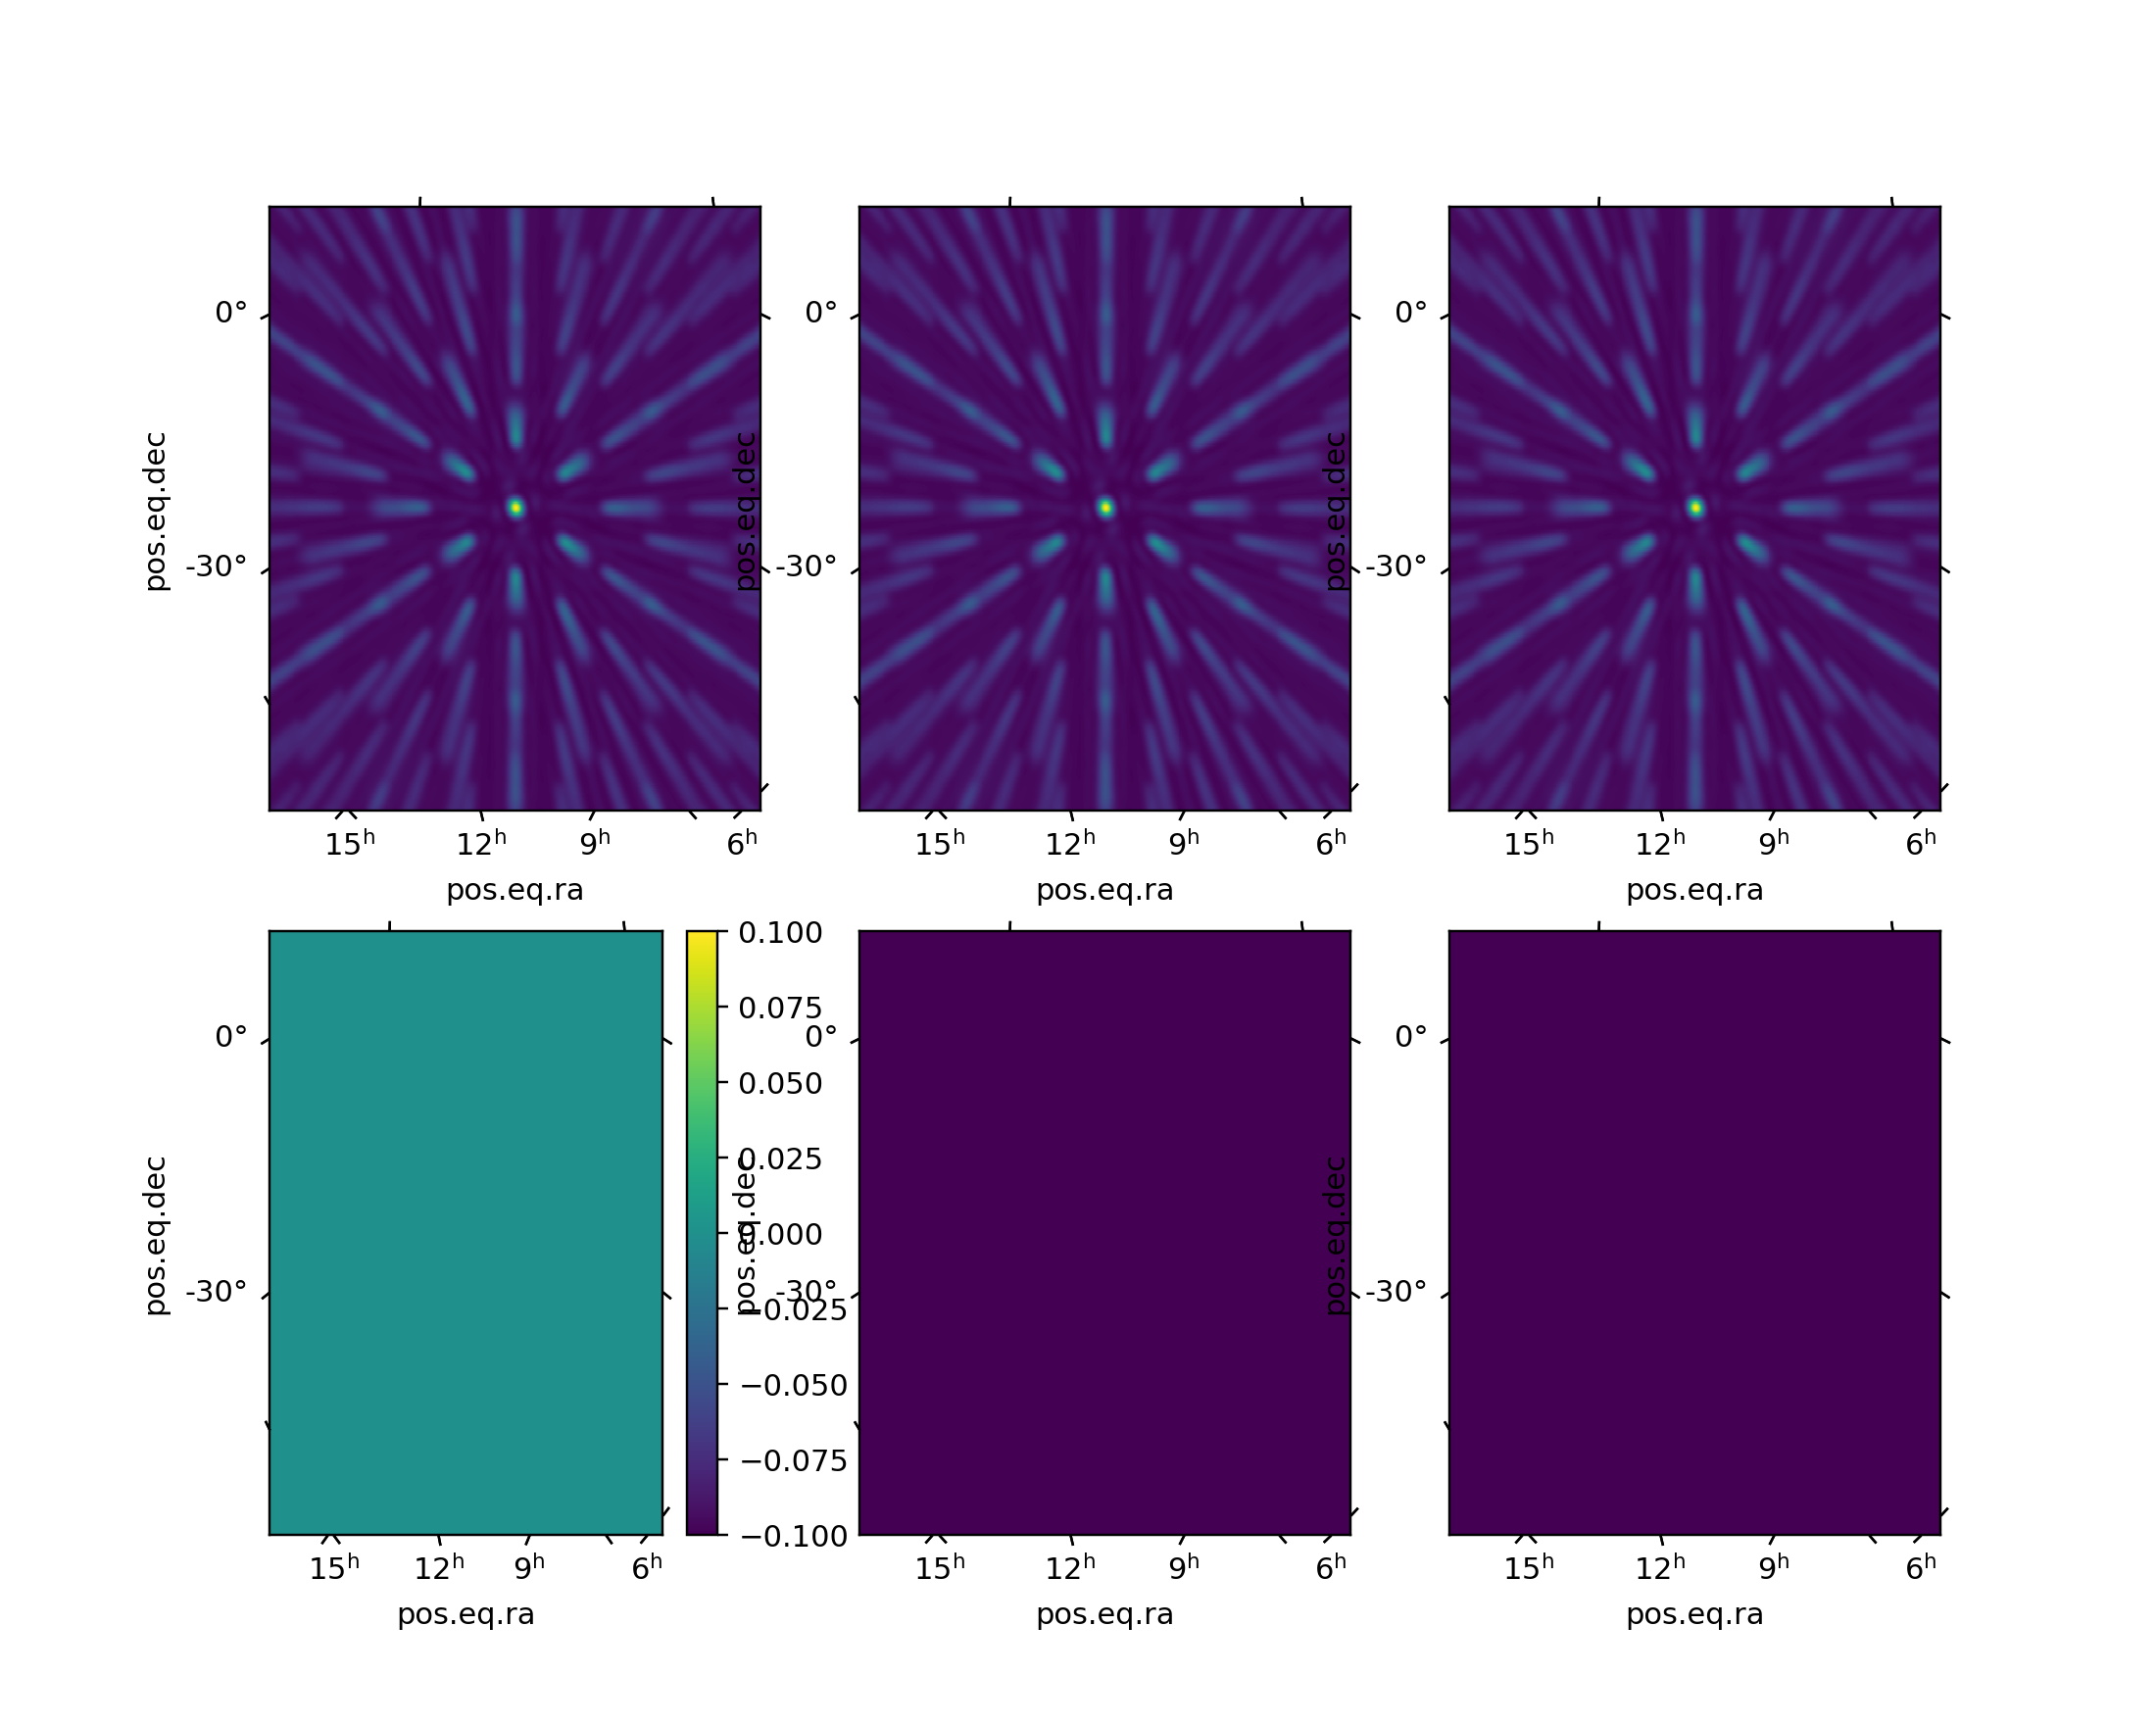

In [27]:
fig, ax = plt.subplots(nrows=2, ncols=3, sharex = 'all', sharey = 'all',
                       subplot_kw = {'projection' : image_wcs},
                      figsize=(10,8))
ax[0,0].imshow(avg['psf'][0].data[0,0,:,:], aspect='auto')
ax[0,1].imshow(hflag['psf'][0].data[0,0,:,:], aspect='auto')
ax[0,2].imshow(diff['psf'][0].data[0,0,:,:], aspect='auto')
im = ax[1,0].imshow(avg['psf'][0].data[0,0,:,:] - hflag['psf'][0].data[0,0,:,:], aspect='auto')
plt.colorbar(im, ax=ax[1,0])
ax[1,1].imshow(hflag['psf'][0].data[0,0,:,:] - diff['psf'][0].data[0,0,:,:], aspect='auto')
ax[1,2].imshow(diff['psf'][0].data[0,0,:,:] - avg['psf'][0].data[0,0,:,:], aspect='auto')

In [28]:
I_avg = avg['image'][0].data[0,0,:,:]
I_avg -= I_avg.mean()

In [29]:
I_hflag = hflag['image'][0].data[0,0,:,:]
I_hflag -= I_hflag.mean()

In [30]:
fac = (I_avg * I_hflag).sum()/np.power(I_avg,2).sum()
fac

0.9729238

In [31]:
print(np.var(I_hflag - I_avg ), np.var(I_hflag - I_avg * fac))

0.3140453 0.130966


<IPython.core.display.Javascript object>


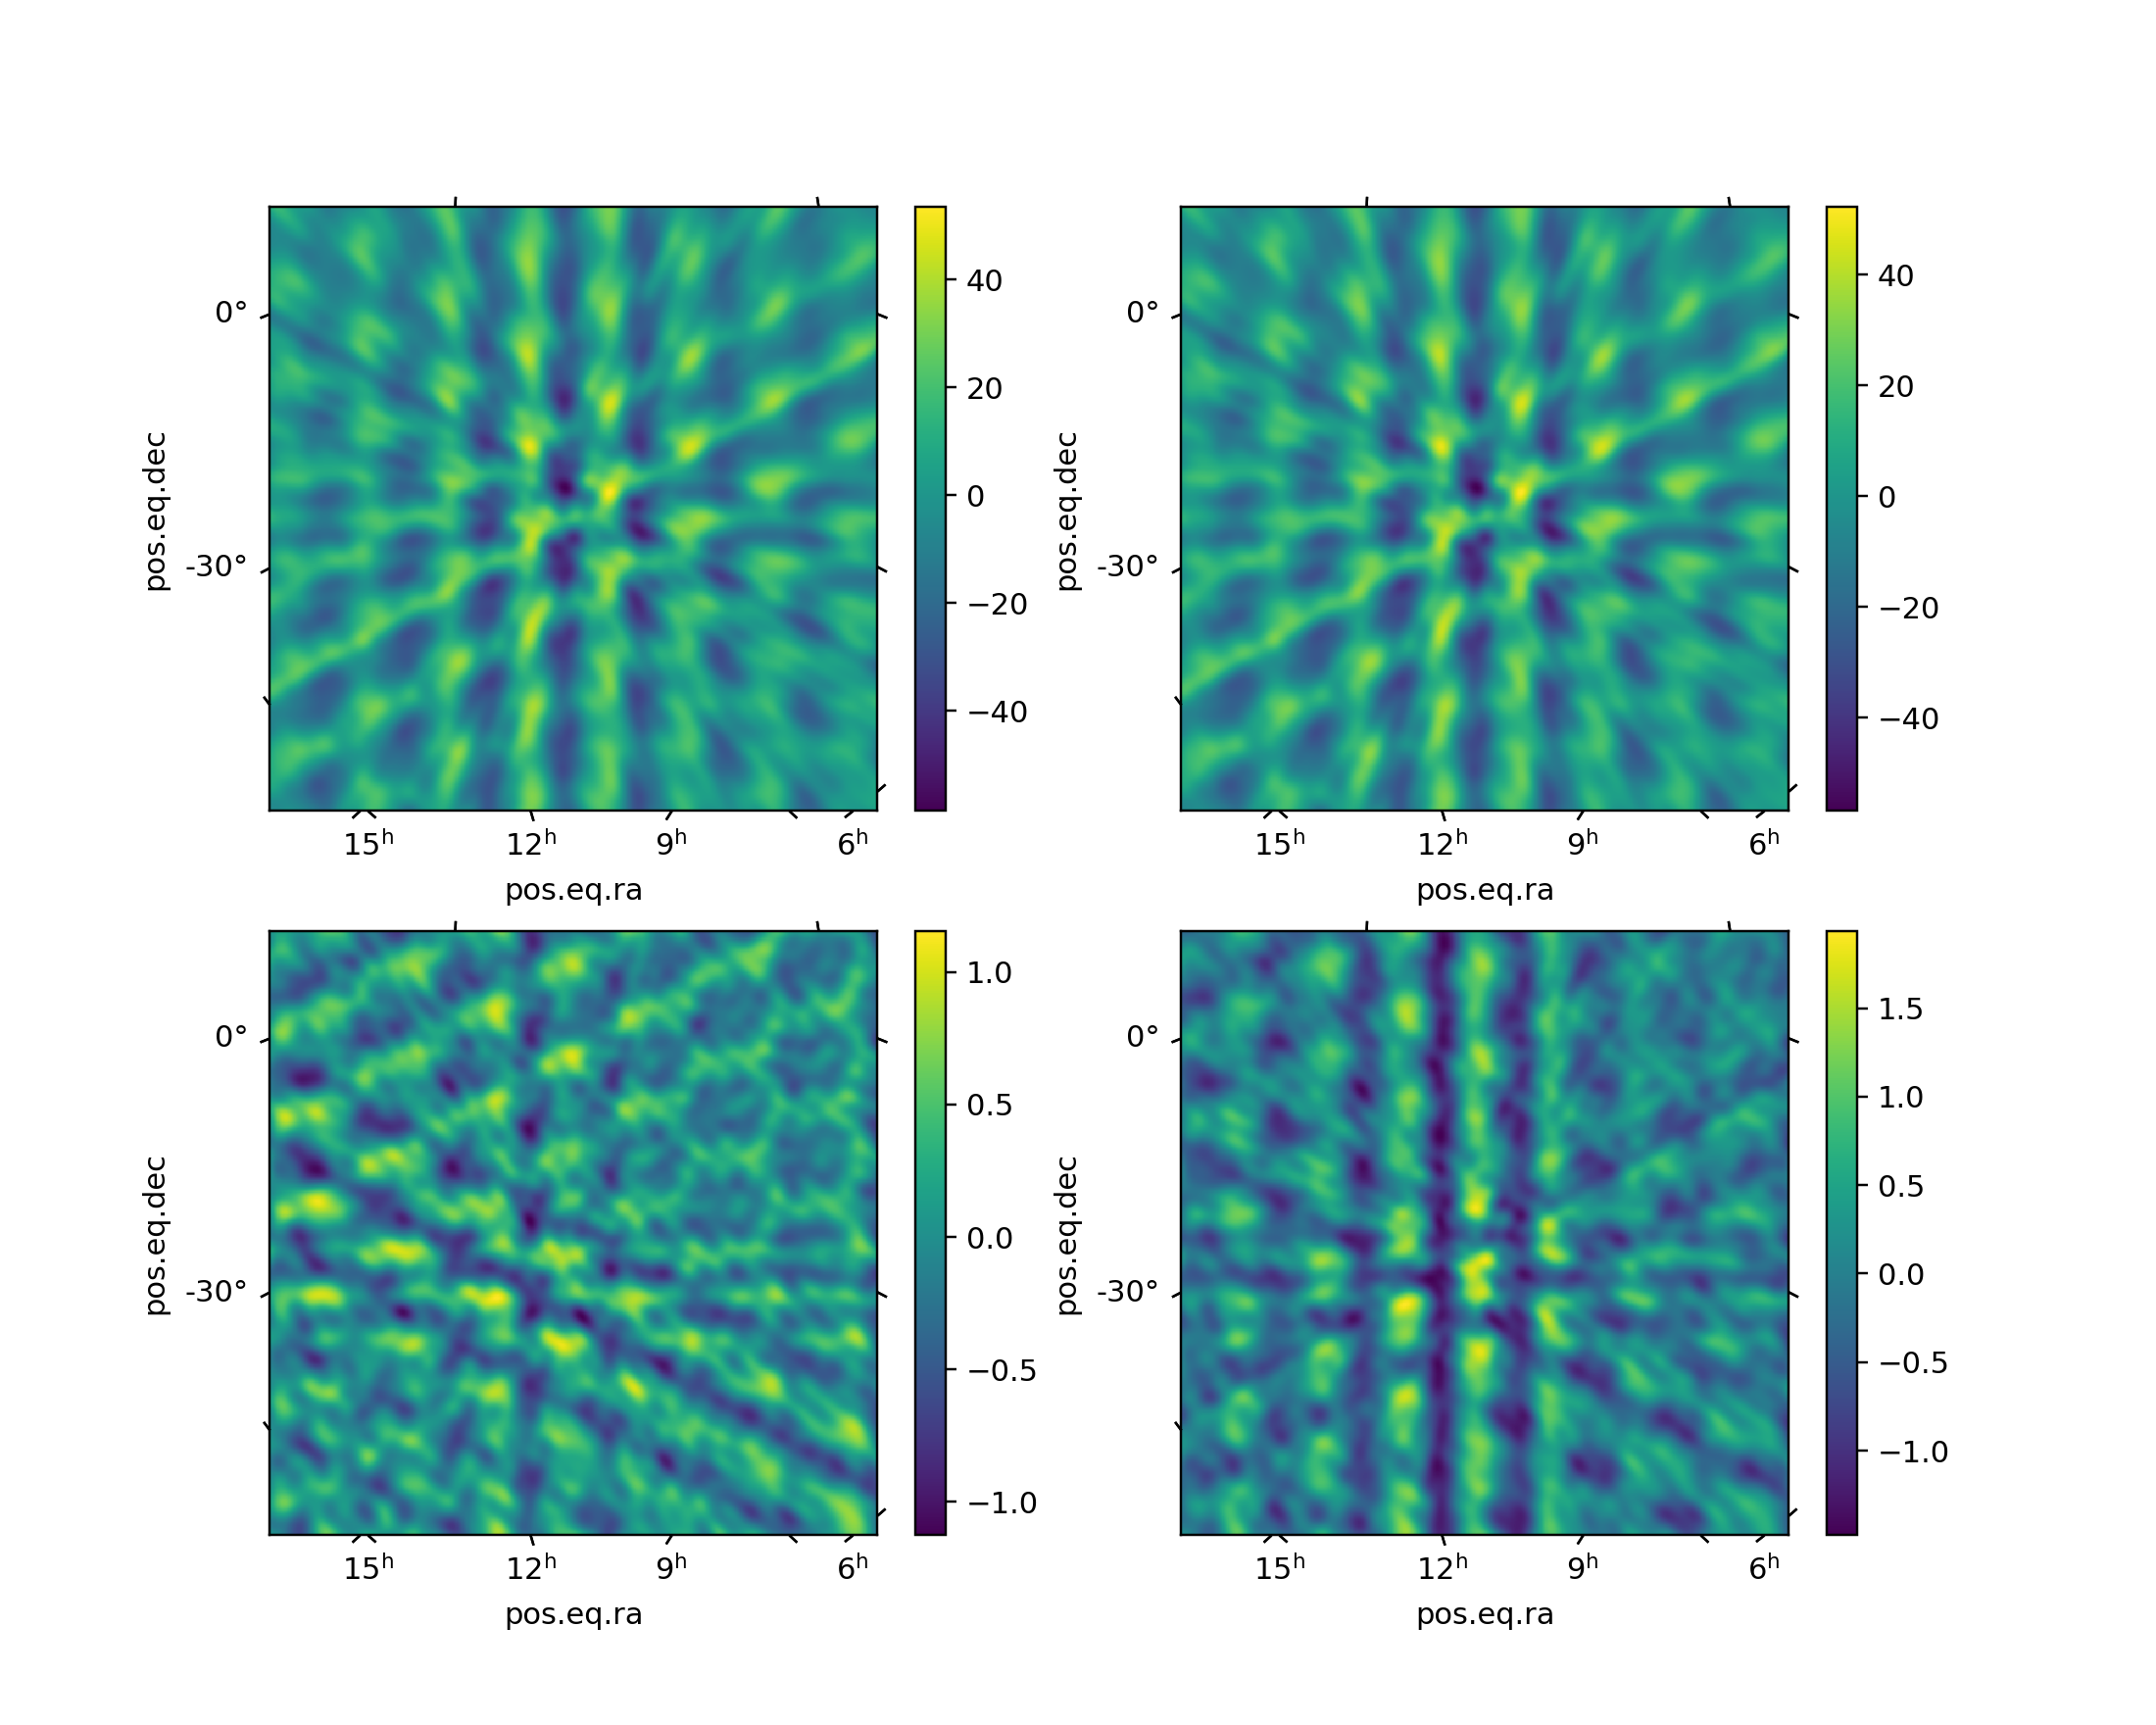

In [39]:
fig, ax = plt.subplots(nrows=2, ncols=2, sharex = 'all', sharey = 'all',
                       subplot_kw = {'projection' : image_wcs},
                      figsize=(10,8))
im = ax[0,0].imshow(I_avg, aspect='auto')
#ax[0,0].title('Avg')
plt.colorbar(im, ax=ax[0,0])
im = ax[0,1].imshow(I_hflag, aspect='auto')
#plt.title('Day', ax=[0,1])
plt.colorbar(im, ax=ax[0,1])
im = ax[1,0].imshow(I_hflag - I_avg*fac, aspect='auto')
#ax[1,0].title('Im(Day) - Im(Avg)')
plt.colorbar(im, ax=ax[1,0])
im = ax[1,1].imshow(diff['image'][0].data[0,0,:,:], aspect='auto')
#ax[1,1].title('Im(Day - Avg)')
plt.colorbar(im, ax=ax[1,1])

<IPython.core.display.Javascript object>


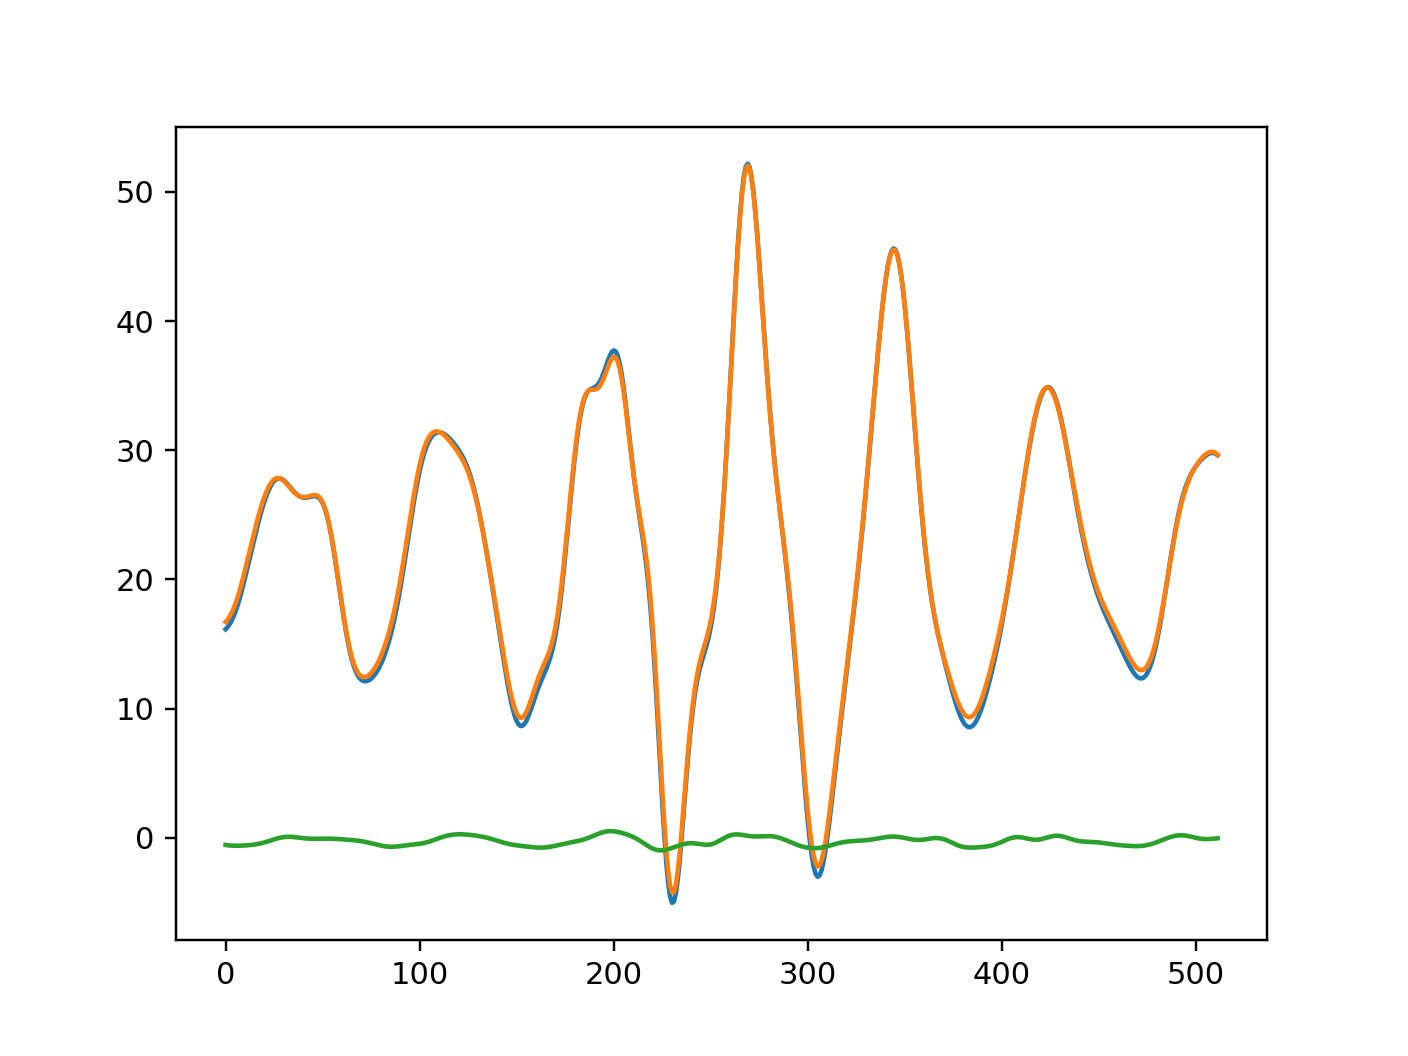

In [38]:
plt.figure()
plt.plot(I_hflag[:,286])
plt.plot(I_avg[:,286]*fac)
plt.plot(I_hflag[:,286] - I_avg[:,286]*fac)

<IPython.core.display.Javascript object>


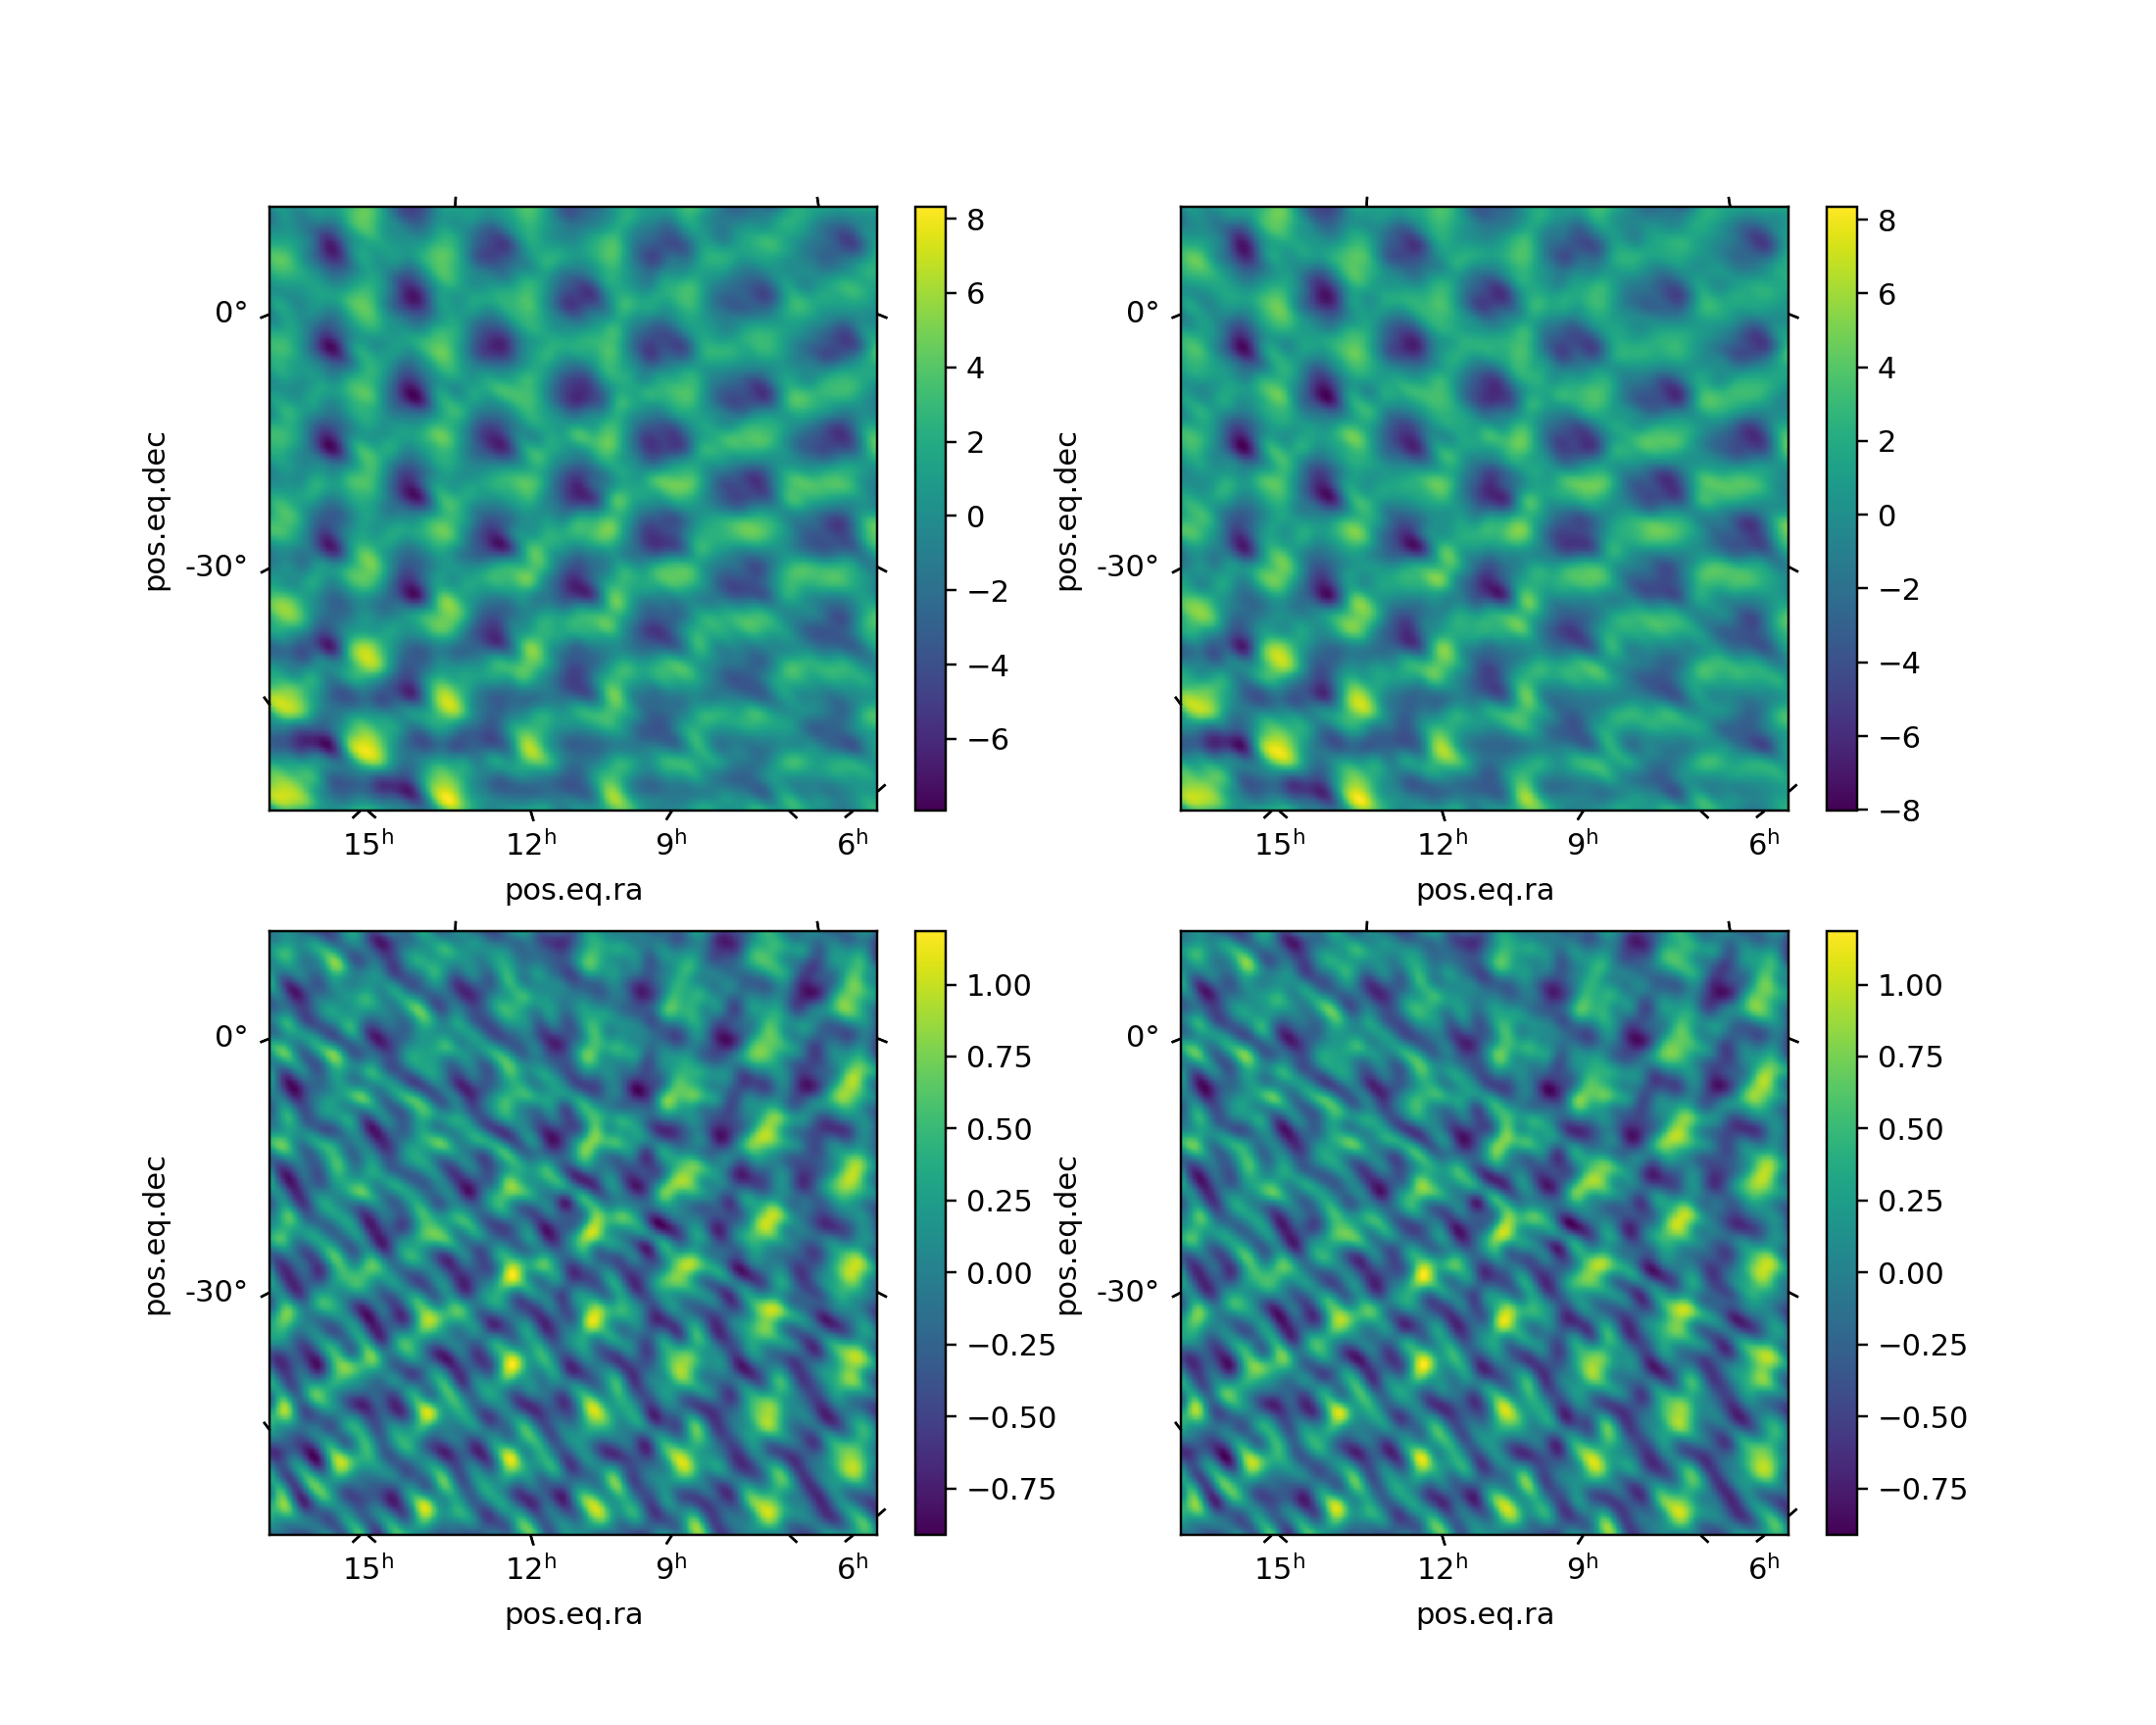

In [44]:
pol=3
fig, ax = plt.subplots(nrows=2, ncols=2, sharex = 'all', sharey = 'all',
                       subplot_kw = {'projection' : image_wcs},
                      figsize=(10,8))
im = ax[0,0].imshow(hflag['image'][0].data[pol,0,:,:], aspect='auto')
plt.colorbar(im, ax=ax[0,0])
im = ax[0,1].imshow(avg['image'][0].data[pol,0,:,:], aspect='auto')
plt.colorbar(im, ax=ax[0,1])
im = ax[1,0].imshow(hflag['image'][0].data[pol,0,:,:] - avg['image'][0].data[pol,0,:,:], aspect='auto')
plt.colorbar(im, ax=ax[1,0])
#im = ax[1,1].imshow(hflag['image'][0].data[pol,0,:,:] - avg['image'][0].data[pol,0,:,:] - diff['image'][0].data[pol,0,:,:], aspect='auto')
im = ax[1,1].imshow(diff['image'][0].data[pol,0,:,:], aspect='auto')
plt.colorbar(im, ax=ax[1,1])

In [96]:
np.std(hflag['image'][0].data[pol,0,:,:] - avg['image'][0].data[pol,0,:,:] * fac)

0.3572377

<IPython.core.display.Javascript object>


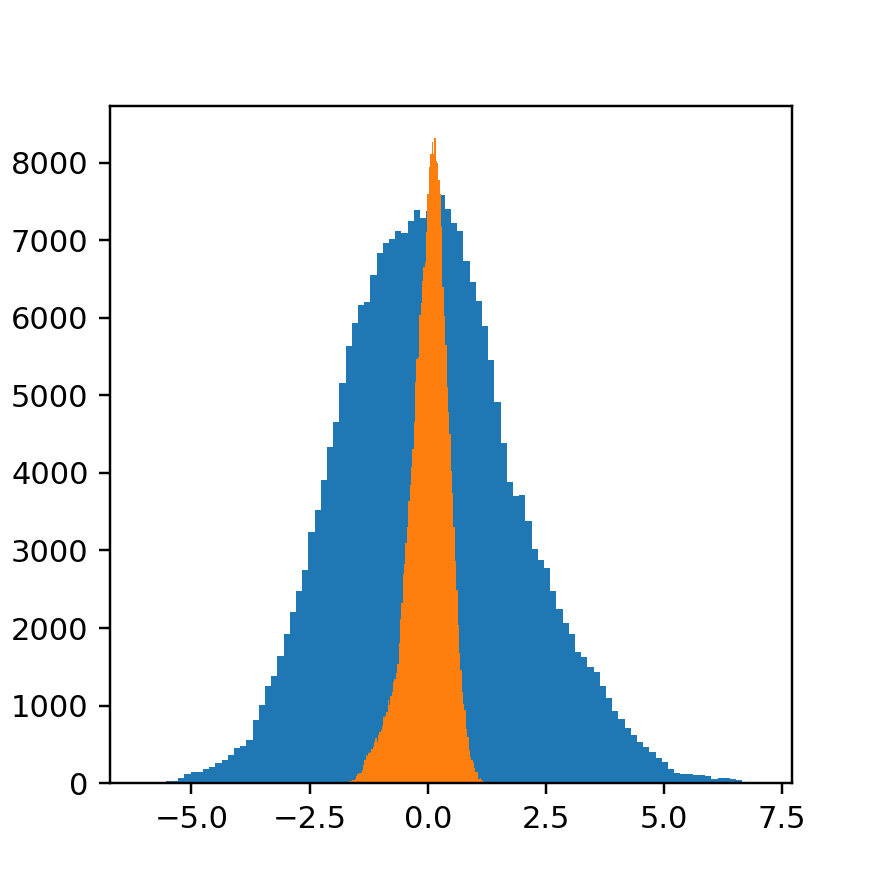

In [47]:
pol=1
plt.figure(figsize=(4,4))
h,b,p = plt.hist((hflag['image'][0].data[pol,0,:,:]).flatten(), bins=100)
h,b,p = plt.hist((hflag['image'][0].data[pol,0,:,:] - avg['image'][0].data[pol,0,:,:] * fac).flatten(), bins=100)
#plt.yscale('log')